<a href="https://colab.research.google.com/github/hyojin13/data_analysis/blob/main/0_PythonBasics_Class_Method_Member_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why do we need Pandas library?

1. You need to collect data and reorganize it for further analysis.
2. When various types of data with different formats are integrated into a uniform structure that computers can understand, it becomes useful.
3. Useful classses in Pandas library
- Serious Class
- Data frame class

4. Useful functions in Pandas library
- Series()
- DataFrame()
- read_csv()
- read_excel(), etc.


In [12]:
import pandas as pd
import numpy as np

ids = range(1, 91)
study_methods = ['Self-Study'] * 30 + ['Group Study'] * 30 + ['Online Course'] * 30
exam_scores = list(np.random.normal(75, 10, 30)) + list(np.random.normal(80, 10, 30)) + list(np.random.normal(78, 10, 30))

data = {
    "ID": ids,
    "Study_Method": study_methods,
    "Exam_Score": exam_scores
}

df = pd.DataFrame(data)
df.to_csv("study_method_exam_scores.csv", index=False)


t-test result: t-statistic = 0.6043748967904595, p-value = 0.5469911000950116
Fail to reject null hypothesis. There is no significant difference in sleep quality based on social media usage time.


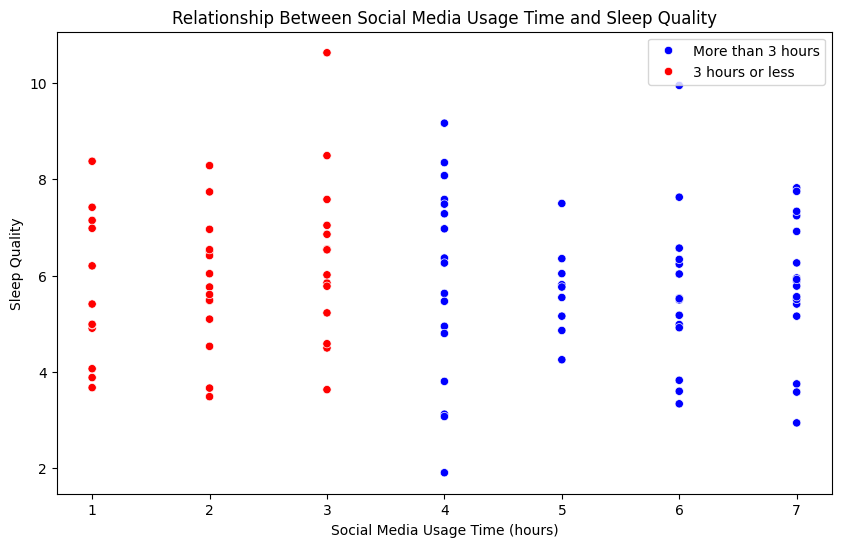

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

data = {"ID": range(1, 101), "Social_Media_Hours": np.random.randint(1, 8, 100), "Sleep_Quality": np.random.normal(6, 1.5, 100)}
df = pd.DataFrame(data)
df['Usage_Group'] = np.where(df['Social_Media_Hours'] > 3, 'More than 3 hours', '3 hours or less')
df.to_csv("social_media_sleep_quality.csv", index=False)

df = pd.read_csv("social_media_sleep_quality.csv")
group1 = df[df['Usage_Group'] == '3 hours or less']['Sleep_Quality']
group2 = df[df['Usage_Group'] == 'More than 3 hours']['Sleep_Quality']

t_stat, p_value = ttest_ind(group1, group2)
print(f"t-test result: t-statistic = {t_stat}, p-value = {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in sleep quality based on social media usage time.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in sleep quality based on social media usage time.")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social_Media_Hours', y='Sleep_Quality', hue='Usage_Group', data=df, palette=['blue', 'red'])

plt.title('Relationship Between Social Media Usage Time and Sleep Quality')
plt.xlabel('Social Media Usage Time (hours)')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

data = {"개인번호": [f"ID_{i:03d}" for i in range(1, 101)],  "소셜미디어_사용시간": np.random.randint(1, 8, 100), "수면_질": np.random.normal(6, 1.5, 100) }
df = pd.DataFrame(data)
df['사용시간_그룹'] = np.where(df['소셜미디어_사용시간'] > 3, '3시간 초과', '3시간 이하')
df.to_csv("social_media_sleep_quality.csv", index=False)

df = pd.read_csv("social_media_sleep_quality.csv")
group1 = df[df['사용시간_그룹'] == '3시간 이하']['수면_질']
group2 = df[df['사용시간_그룹'] == '3시간 초과']['수면_질']


t_stat, p_value = ttest_ind(group1, group2)
print(f"t-검정 결과: t-statistic = {t_stat}, p-value = {p_value}")

alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각. 소셜 미디어 사용 시간에 따른 수면의 질에 유의미한 차이가 있다.")
else:
    print("귀무가설을 기각에 실패. 소셜 미디어 사용 시간에 따른 수면의 질에 유의미한 차이가 없다.")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social_Media_Hours', y='Sleep_Quality', hue='Usage_Group', data=df, palette=['blue', 'red'])

plt.title('Relationship Between Social Media Usage Time and Sleep Quality')
plt.xlabel('Social Media Usage Time (hours)')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()

t-검정 결과: t-statistic = -1.0037829628996187, p-value = 0.317955300949579
귀무가설을 기각에 실패. 소셜 미디어 사용 시간에 따른 수면의 질에 유의미한 차이가 없다.


ValueError: Could not interpret value `Social_Media_Hours` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
#anova oneway
import pandas as pd
import numpy as np

# 90명의 데이터를 생성
data = {
    "학생번호": [f"ID_{i:03d}" for i in range(1, 91)],  # 학생번호 형식으로 변경
    "학습방법": np.random.choice(["독학", "그룹 스터디", "온라인 강의"], 90),  # 학습 방법
    "시험성적": np.random.normal(75, 10, 90)  # 평균 75점, 표준편차 10점인 정규분포
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# CSV 파일로 저장
df.to_csv("study_methods_exam_scores.csv", index=False)

import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 데이터 불러오기
df = pd.read_csv("study_methods_exam_scores.csv")

# 일원 분산 분석 (One-Way ANOVA) 수행
model = ols('시험성적 ~ C(학습방법)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 결과 출력
print(anova_table)

# 통계적 유의성 판단
alpha = 0.05
if anova_table["PR(>F)"][0] < alpha:
    print("귀무가설을 기각합니다. 학습 방법에 따른 시험 성적에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각하지 못합니다. 학습 방법에 따른 시험 성적에 유의미한 차이가 없습니다.")



In [ ]:
a = 1

dang():

jenny():

a
b
c
object, instant object, instance object #미리 정의한 class를 가져와서 사용

### <font color = 'orange'> ⏰  **Class, Class method, Object variable, Class variable, Class Inheritance, Global vs. Local, Class initiate**

---
1. Class (Unit 049 & Unit 05)
  * 하나의 독립된 공간을 클래스라고 하는데, 이를 위해서는 이름을 지정하여 공간 (i.e., **class NameClass:**) 이름공간을 만든다.
  * NameClass를 **함수처럼 호출**하여 (i.e., <font color = 'brown'> NameClass() 라고 ()를 붙여 codeline 쓰기</font>) 이를 **Instant Object**(인스턴트 객체) 혹은 Object 혹은 Instance로 만든다. 이후 해당 Instant Object (i.e., either Object or Instance (of a specific Class))는 Variable로 역할 한다.

  When you refer to an "instant object" or "instance object" in the context of a class, you are talking about a specific **object** that has been created from that class. A **object** or **instance** (of a class) has their own unique data and can perform actions as defined by the class methods.

    - 객체(object) or 인스턴스(instance)

      - <font color = 'red'> **클래스로 만든 객체를 ‘인스턴스’라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까?**  

        - a = Cookie(): Class Cookie()로 만든 a는 객체(Object)이다.
        - 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다. a 객체는 Class Cookie()의 인스턴스(Instance)다.  
        - <추가 설명> ‘a는 인스턴스’보다 ‘a는 객체’라는 표현이 어울리며 ‘a는 Cookie의 객체’보다 ‘a는 Cookie의 인스턴스’라는 표현이 훨씬 잘 어울린다.
    - 📌 객체에 생성되는 객체만의 변수를 ‘객체변수’ 또는 ‘속성’
      - a.first = 4라는 문장이 수행되면 a 객체에 객체변수 first가 생성되고 4라는 값이 저장된다. 이와 마찬가지로 a.second = 2라는 문장이 수행되면 a 객체에 객체변수 second가 생성되고 2라는 값이 저장된다.
      - 📍클래스로 만든 객체의 객체변수는 다른 객체의 객체변수에 상관없이 독립적인 값을 유지한다.





In [ ]:
class FourCal: # Define a class named 'FourCal'
  def setdata(self, first, second):  # Define a method 'setdata' within the class. "Method" is a special name for a function defined within a class. 📌 메서드의 매개변수
                                     # 파이썬 메서드의 첫 번째 매개변수 이름은 관례적으로 self를 사용. 📌 객체를 호출할 때 호출한 객체 자신이 전달되기 때문에 self라는 이름을 사용. 다른 이름을 사용해도 상관X.
                                     # This method takes three parameters: 'self', 'first', and 'second'.
                                     # 'self' is a reference to the instance of the class (the object itself). 추후 예시에서 보충 설명
                                     # 'first' and 'second' are the values that will be stored in the instance.
    self.first = first               # Assign the 'first' parameter to an instance variable 'first'. 메서드의 수행문
                                     # 📌 객체에 생성되는 객체만의 변수를 ‘객체변수’ 또는 ‘속성’
                                     # This stores the 'first' value in the object. 📌 a 객체에 객체변수 first가 생성되고 4라는 값이 저장

    self.second = second             # Assign the 'second' parameter to an instance variable 'second'. 메서드의 수행문
                                     # his stores the 'second' value in the object. 📌 a 객체에 객체변수 second가 생성되고 2라는 값이 저장

In [ ]:
class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second= second

a= FourCal()
b= FourCal()

In [ ]:
# Example
class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second =second

#a 객체를 만들고 a 객체를 통해 setdata 메서드를 호출

a = FourCal()
b = FourCal()

In [ ]:
type(a)

__main__.FourCal

In [ ]:
type(b)

__main__.FourCal

In [ ]:
# Continued from the above code cell

a.setdata(10,20)
b.setdata(300,400)

In [ ]:
a.setdata(10,20)
b.setdata(300,400)
a.first
a.second
b.first
b.second

400

In [ ]:
#a 객체에 객체변수 first 생성된 것을 확인하기
a.first

10

In [ ]:
#a 객체에 객체변수 second 생성된 것을 확인하기
a.second

20

In [ ]:
b.first

300

In [ ]:
b.second

400

- 🎃 a 객체의 first 값은 b 객체의 first 값에 영향받지 않고 원래 값을 유지하고 있다는 것을 확인
- 👻 클래스로 만든 객체의 객체변수는 다른 객체의 객체변수에 상관없이 독립적인 값을 유지

### **For your information**

- setdata 메서드에는 self, first, second 총 3개의 매개변수가 필요한데 실제로는 a.setdata(4, 2)처럼 2개의 값만 전달했다. 왜 그럴까? a.setdata(4, 2)처럼 호출하면 setdata 메서드의 첫 번째 매개변수 self에는 setdata 메서드를 호출한 객체 a가 자동으로 전달되기 때문이다. 다음 그림을 보면 객체를 호출할 때 입력한 값이 메서드에 어떻게 전달되는지 쉽게 이해할 수 있을 것이다.

- 파이썬 메서드의 첫 번째 매개변수 이름은 관례적으로 self를 사용한다. 객체를 호출할 때 호출한 객체 자신이 전달되기 때문에 self라는 이름을 사용한 것이다. 물론 self말고 다른 이름을 사용해도 상관없다.

- 메서드의 첫 번째 매개변수 self를 명시적으로 구현하는 것은 파이썬만의 독특한 특징이다. 예를 들어 자바와 같은 언어는 첫 번째 매개변수 self가 필요없다.

메서드를 호출하는 또 다른 방법
잘 사용하지는 않지만, 다음과 같이 클래스를 이용해 메서드를 호출할 수도 있다.

    a = FourCal()
    FourCal.setdata(a, 4, 2)

>

위와 같이 ‘클래스명.메서드’ 형태로 호출할 때는 객체 a를 첫 번째 매개변수 self에 꼭 전달해야 한다. 반면 다음처럼 ‘객체.메서드’ 형태로 호출할 때는 self를 반드시 생략해서 호출해야 한다.

    a = FourCal()
    a.setdata(4, 2)

In [ ]:
class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second = second
  def add(self):
    result = self.first + self.second
    return result

In [ ]:
#클래스 만들기: 확장1 -> addition

class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second = second

  def add(self):
    result = self.first + self.second
    return result

In [ ]:
a = FourCal()
a.setdata(10,20)
a.add()


30

In [ ]:
#객체 a, 객체변수 first, 객체변수 second 할당, add 연산

a = FourCal()
a.setdata(10,20)
a.add()

NameError: name 'first' is not defined

In [ ]:
#클래스 만들기: 확장2 -> subtraction, multiplicaton, division

class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second = second

  def add(self):
    result = self.first + self.second
    return result

  def sub(self):
    result = self.first - self.second
    return result

  def mul(self):
    result = self.first * self.second
    return result

  def div(self):
    result = self.first / self.second
    return result

a = FourCal()
b = FourCal()

a.setdata(10,20)
b.setdata(300,400)

In [ ]:
a.add()

30

In [ ]:
b.add()

700

In [ ]:
a.sub()

-10

In [ ]:
b.sub()

-100

In [ ]:
a.mul()

200

In [ ]:
b.mul()

120000

In [ ]:
a.div()

0.5

In [ ]:
b.div()

0.75

Class Inheritance
- 기존 클래스가 라이브러리 형태로 제공되거나 수정이 허용되지 않는 상황이라면 상속을 사용
- 아래 예시는 제곱 (power) 메소드

In [ ]:
class MoreFourCal(FourCal):
  def pow(self):
    result = self.first ** self.second
    return result

a = MoreFourCal()

In [ ]:
class MoreFourCal(FourCal):
  def pow (self):
    result =self.first ** self.second
    return result

a= MoreFourCal()

NameError: name 'MoreFourcal' is not defined

In [ ]:
a.setdata(10,20)
a.pow()

100000000000000000000

- 클래스변수는 클래스 안에 변수를 선언하여 생성
- 📍클래스변수는 객체변수와 달리 클래스로 만든 모든 객체에 공유된다

In [ ]:
class Family():
  lastname = 'Chandler'

a = Family()
b = Family()

In [ ]:
a.lastname #클래스변수는 클래스이름.클래스변수로 사용


'Chandler'

In [ ]:
b.lastname

'Chandler'

In [ ]:
Family.lastname = 'Poppins'

In [ ]:
a.lastname

'Poppins'

In [ ]:
b.lastname

'Poppins'

In [ ]:
lastname.

### <font color = 'brown'> 💈 Get more exercises on Python classes!

In [ ]:
class Greetings: #독립된 공간을 Class 라고 함
  def sayHello(self): #Class Method
    print('How are you?')

  def sayBye(self,name): #Class Method에서 두 번째 인자로 사용되는 name은 Instant Member
    print('%s! see you!' %name)

obj = Greetings()
obj.sayHello()
obj.sayBye('Emma')

How are you?
Emma! see you!


In [ ]:
#Caculator.py

result = 0 #global variable named result and assigns it the value 0

def add(num): # a function named add that takes one parameter, num.
  global result #This line declares that within the add function, we intend to use the global variable result. This allows us to modify the global result variable within the function.
  result += num # 결괏값(result)에 입력값(num) 더하기: It adds the value of the num parameter to the global result variable. It accumulates the values over multiple function calls, updating the running total.
  return result

print(add(3))
print(add(4))
print(add(5))

3
7
12


In [ ]:
class Calculator:
    def initialize(self): #The initialize method is used to set the initial value of self.result to 0
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

    def sub(self, num):
        self.result -= num
        return self.result

# Create an instance of the Calculator class
calc = Calculator()

# Initialize the calculator's result
calc.initialize()

# Perform addition and subtraction
result_add = calc.add(1)
result_sub = calc.sub(1)

print(result_add)
print(result_sub)

1
0


## 🔥🐹🐶🐤🐭 <font color = 'organge'>**Find a basic Python textbook, read and exercise the content about classes thoroughly!**